In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [17]:
from tensorflow.keras.datasets import mnist

In [18]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

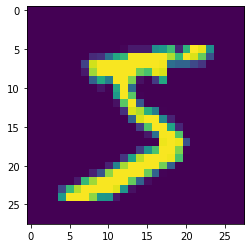

In [19]:
plt.imshow(X_train[0])

In [20]:
X_train = X_train/255
X_test = X_test/255

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape

In [22]:
from tensorflow.keras.optimizers import SGD

In [23]:
encoder = Sequential()
encoder.add(Flatten(input_shape = [28,28]))
encoder.add(Dense(400, activation = 'relu'))
encoder.add(Dense(200, activation = 'relu'))
encoder.add(Dense(100, activation = 'relu'))
encoder.add(Dense(50, activation = 'relu'))
encoder.add(Dense(25, activation = 'relu'))

In [24]:
decoder = Sequential()
decoder.add(Dense(50, input_shape = [25], activation = 'relu'))
decoder.add(Dense(100, activation = 'relu'))
decoder.add(Dense(200, activation = 'relu'))
decoder.add(Dense(400, activation = 'relu'))
decoder.add(Dense(28 * 28, activation = 'sigmoid'))
decoder.add(Reshape([28, 28]))

In [25]:
autoencoder = Sequential([encoder, decoder])

In [28]:
autoencoder = Sequential([encoder, decoder])
autoencoder.compile(loss="binary_crossentropy",optimizer=SGD(lr=1.5),metrics=['accuracy'])

In [31]:

autoencoder.fit(X_train, X_train,
                epochs=5)

Epoch 1/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1572 - accuracy: 0.2042
Epoch 2/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1480 - accuracy: 0.2157
Epoch 3/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1410 - accuracy: 0.2253
Epoch 4/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1369 - accuracy: 0.23090s - loss: 0.1369 - accu
Epoch 5/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1317 - accuracy: 0.2365


In [32]:
passed_images = autoencoder.predict(X_test[:10])

Original image


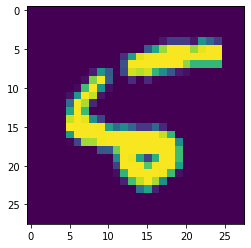

Attempt


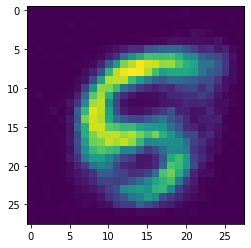

In [35]:
n = 8
print('Original image')
plt.imshow(X_test[n])
plt.show()
print('Attempt')
plt.imshow(passed_images[n])

In [36]:
from tensorflow.keras.layers import GaussianNoise

In [37]:
sample = GaussianNoise(0.2)

In [38]:
noisey = sample(X_test[:10], training = True)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



original


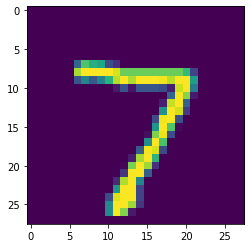

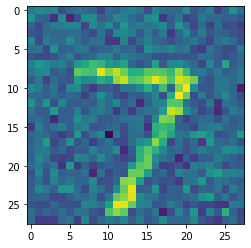

In [39]:
n = 0
print('original')
plt.imshow(X_test[n])
plt.show()
plt.imshow(noisey[n])

In [40]:
import tensorflow as tf

In [41]:
tf.random.set_seed(101)
np.random.seed(101)

encoder = Sequential()
encoder.add(Flatten(input_shape = [28,28]))

encoder.add(GaussianNoise(0.2))

encoder.add(Dense(400, activation = 'relu'))
encoder.add(Dense(200, activation = 'relu'))
encoder.add(Dense(100, activation = 'relu'))
encoder.add(Dense(50, activation = 'relu'))
encoder.add(Dense(25, activation = 'relu'))

In [42]:
decoder = Sequential()
decoder.add(Dense(50, input_shape = [25], activation = 'relu'))
decoder.add(Dense(100, activation = 'relu'))
decoder.add(Dense(200, activation = 'relu'))
decoder.add(Dense(400, activation = 'relu'))
decoder.add(Dense(28 * 28, activation = 'sigmoid'))
decoder.add(Reshape([28, 28]))

In [43]:
noise_remover = Sequential([encoder, decoder])

In [46]:
noise_remover.compile(loss = 'binary_crossentropy',
                     optimizer = 'adam',
                     metrics = ['accuracy'])

In [47]:
noise_remover.fit(X_train, X_train, epochs=8)

Epoch 1/8
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1706 - accuracy: 0.1795
Epoch 2/8
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1293 - accuracy: 0.2315
Epoch 3/8
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1207 - accuracy: 0.2455
Epoch 4/8
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1150 - accuracy: 0.2554
Epoch 5/8
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1107 - accuracy: 0.2624
Epoch 6/8
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1079 - accuracy: 0.2675
Epoch 7/8
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1055 - accuracy: 0.2718
Epoch 8/8
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1034 - accuracy: 0.2755


In [48]:
ten_noise_images = sample(X_test[:10], training = True)

In [49]:
denoised = noise_remover(ten_noise_images)

Original image


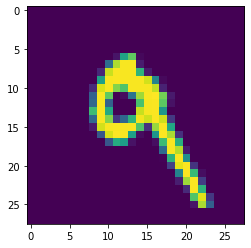

noise added


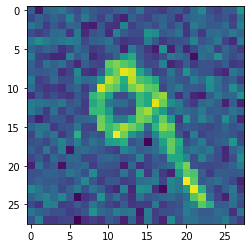

after noise removal


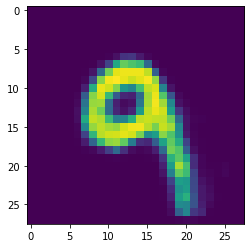

In [54]:
n = 7
print('Original image')
plt.imshow(X_test[n])
plt.show()
print('noise added')
plt.imshow(ten_noise_images[n])
plt.show()
print('after noise removal')
plt.imshow(denoised[n])
plt.show()